In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm

from image_code import farside_functions as ff 
from image_code import image_calculation_functions as ic

In [2]:
x =0
H_o = np.linspace(0,90,1)*np.pi/180
de = np.array([30])*np.pi/180

In [3]:
de=0
H_o=0

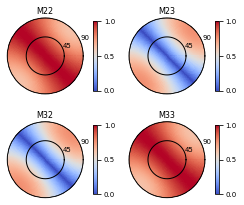

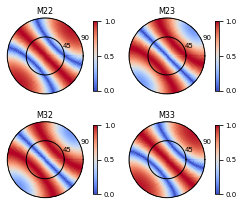

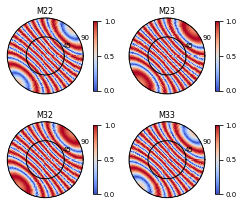

In [4]:
ff.offset_vmuller_cal(de,H_o,50)


In [4]:
phi = np.linspace(0,360,361)*np.pi/180
theta = np.linspace(0,90,91)*np.pi/180
P,T = np.meshgrid(phi,theta)

In [5]:
theta_p=181
phi_p=361
beam_squarel,ethetal, ephil=ic.read_feko('/data4/nmahesh/edges/Lunar/beam_files/dipole_0p1-1MHz_regolith-0',31,theta_p,phi_p)
beam_squarel90,ethetal90,ephil90=ic.read_feko('/data4/nmahesh/edges/Lunar/beam_files/dipole_0p1-1MHz_regolith-90',31,theta_p,phi_p)

beam_squareh,ethetah, ephih = ic.read_feko('/data4/nmahesh/edges/Lunar/beam_files/dipole_0p4-40MHz_regolith',10,theta_p,phi_p)
beam_squareh90,ethetah90,ephih90 = ic.read_feko('/data4/nmahesh/edges/Lunar/beam_files/dipole_0p4-40MHz_regolith-90',10,theta_p,phi_p)



NameError: name 'etheta' is not defined

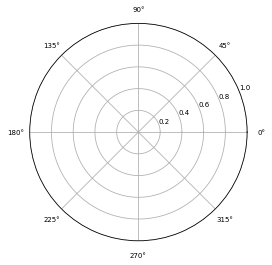

In [8]:
fig,ax = plt.subplots(1,1, subplot_kw=dict(polar=True),figsize=(4,4))
p=ax.pcolormesh(P,T,np.abs(etheta[4,:90,:]**2) + np.abs(etheta90[4,:90,:]**2)+np.abs(ephi[4,:90,:]**2) + np.abs(ephi90[4,:90,:]**2))
plt.colorbar(p,ax=ax)

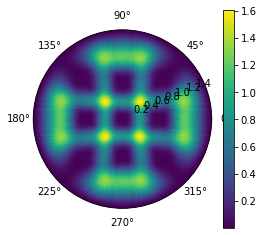

In [145]:
fig,ax = plt.subplots(1,1, subplot_kw=dict(polar=True),figsize=(4,4))
p=ax.pcolormesh(P,T,(beam_squareh[4,:90,:] + beam_squareh90[4,:90,:]))
plt.colorbar(p,ax=ax)

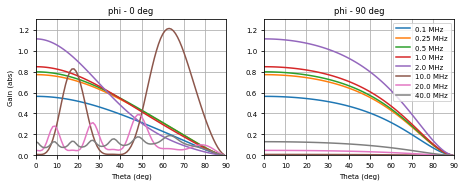

In [23]:
f = np.array([0.1,0.25,0.5,1,2,10,20,40])#np.round(np.linspace(0.1,1,len(beam_squarel[:,0,0])),2)
index1 = np.array([0,5,13,30,3,4,5,6])
#index2 = np.array([3,4,5,6])
#plt.figure(figsize=(7.5,5))
fig,ax = plt.subplots(1,2, subplot_kw=dict(polar=False),figsize=(7.5,2.5))

plt.subplot(1,2,1)

for i  in range(len(f)):
    if i <4:
        plt.plot(beam_squarel[index1[i],:90,0],label=str(f[i])+' MHz')
    else:
        plt.plot(beam_squareh[index1[i],:90,0],label = str(f[i])+' MHz')


plt.grid()
#plt.xticks([0,10,20,30,40,50,60,70,80,90],[])
plt.ylabel('Gain (abs)')
plt.xlim([0,90])
plt.ylim([0,1.3])
plt.title('phi - 0 deg')
plt.xlabel('Theta (deg)')

plt.subplot(1,2,2)
for i  in range(len(f)):
    if i <4:
        plt.plot(beam_squarel[index1[i],:90,90],label=str(f[i])+' MHz')
    else:
        plt.plot(beam_squareh[index1[i],:90,90],label = str(f[i])+' MHz')


#plt.xticks([0,10,20,30,40,50,60,70,80,90],[])
plt.legend()
plt.xlim([0,90])
plt.ylim([0,1.3])
plt.title('phi - 90 deg')
plt.grid()
plt.xlabel('Theta (deg)')
#plt.subplot(2,2,3)
'''
for i  in range(len(f)):
    if i <4:
        ax[1,0].plot(beam_squarel90[index1[i],:90,0],label=str(f[i])+' MHz')
    else:
        ax[1,0].plot(beam_squareh90[index1[i],:90,0],label = str(f[i])+' MHz')

#plt.legend()
plt.grid()
plt.xlabel('Theta (deg)')
plt.ylabel('Gain (abs)')
plt.xlim([0,90])
plt.ylim([0,1.3])
plt.title('Y-dipole, phi - 0 deg')

#plt.subplot(2,2,4)
for i  in range(len(f)):
    if i <4:
        plt.plot(beam_squarel90[index1[i],:90,90],label=str(f[i])+' MHz')
    else:
        plt.plot(beam_squareh90[index1[i],:90,90],label = str(f[i])+' MHz')

plt.grid()

#plt.ylabel('Gain (abs)')
#plt.legend()
plt.xlim([0,90])
plt.ylim([0,1.3])
plt.title('Y-dipole, phi - 90 deg')
'''
plt.savefig('/data4/nmahesh/edges/Lunar/plots/lunar_dipole_beam_justX.pdf',dpi=300,bbox_inches='tight')


In [6]:

sample = 1

if sample==0:
    wav = 500 #in m; 
    freq = '0p6_MHz'
    index = 17
    beam_square,etheta, ephi = beam_squarel,ethetal, ephil
    beam_square90,etheta90,ephi90 = beam_squarel90,ethetal90,ephil90
elif sample==1:
    wav = 150 # in m; 
    freq = '2_MHz'
    index = 3
    beam_square,etheta, ephi = beam_squareh,ethetah, ephih
    beam_square90,etheta90,ephi90=beam_squareh90,ethetah90,ephih90
   
    
elif sample==2:
    
    wav = 30 # in m; 
    freq = '10_MHz'
    index = 4
    beam_square,etheta, ephi = beam_squareh,ethetah, ephih
    beam_square90,etheta90,ephi90=beam_squareh90,ethetah90,ephih90
f = 300/wav


####Normalizing by 2 MHz
#etheta = np.roll(etheta,180,axis=2)/np.max(ethetah[3,:,:])
#etheta90 = np.roll(etheta90,180,axis=2)/np.max(ethetah90[3,:,:])
#ephi = np.roll(ephi,180,axis=2)/np.max(ephih[3,:,:])
#ephi90 = np.roll(ephi90,180,axis=2)/np.max(ephih90[3,:,:])

del_ue,del_ve,del_we = ic.uvcal(de,H_o,wav,50.5,50.5)
del_u,del_v,del_w = ic.uvcal(de,H_o,wav,50,50)

In [10]:
M_rego_wavno1 = ff.muller_cal(etheta[index,:,:],ephi[index,:,:],etheta90[index,:,:],ephi90[index,:,:],del_u,del_v,offset=0)

In [48]:
def muller_cal_s(etheta_square,ephi_square,etheta_square90,ephi_square90,del_u,del_v,offset=0):
    M = np.zeros((4,4, np.shape(etheta_square)[0], np.shape(etheta_square)[1]),dtype='complex')
    
    phi = np.linspace(0,360,361)*np.pi/180
    theta = np.linspace(0,90,91)*np.pi/180
    
    
    for i in range(len(theta)):
        for j in range(len(phi)):


            l = np.sin(theta[i])*np.cos(phi[j])
            m = np.sin(theta[i]) * np.sin(phi[j])                             
            del_phi = 2*np.pi* (del_u*l + del_v*m)
            J_b = np.array([[1,0],[0,np.exp(1j*del_phi)]])

            J = np.array([[etheta_square[i,j],ephi_square[i,j]],[etheta_square90[i,j],ephi_square90[i,j]]])
            if offset==1:
                J = np.dot(J_b,J)
            if offset ==2:
                J = J_b
            
            M[:,:,i,j] = 0.5 * np.dot(np.array([[1,0,0,1],[1,0,0,-1],[0,1,1,0],[0,-1j,1j,0]]) , np.kron(J,np.conj(J))).dot(np.array([[1,1,0,0],[0,0,1,1j],[0,0,1,-1j],[1,-1,0,0]]))
          
            
    return M[0,0],M[0,1],M[0,2],M[0,3],M[1,0],M[1,1],M[1,2],M[1,3],M[2,0],M[2,1],M[2,2],M[2,3],M[3,0],M[3,1],M[3,2],M[3,3]

In [49]:
M_rego_wavno1_s = muller_cal_s(etheta[index,:,:],ephi[index,:,:],etheta90[index,:,:],ephi90[index,:,:],del_u,del_v,offset=0)

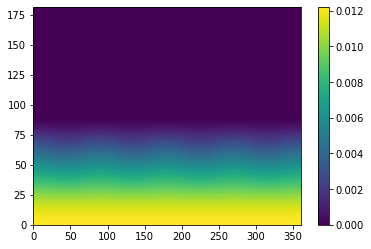

In [50]:
plt.pcolormesh(np.abs(M_rego_wavno1_s[0]));plt.colorbar()

In [11]:
ff.plot_muller_cal_abs(M_rego_wav2_s,title='Dipole100m_regolith_nooffset_'+freq+'_abs', save_fig=False)

NameError: name 'M_rego_wav2_s' is not defined

In [20]:
np.save('/data4/nmahesh/edges/Lunar/M_rego_wav0', M_rego_wav0)
np.save('/data4/nmahesh/edges/Lunar/M_rego_wavno0', M_rego_wavno0)
np.save('/data4/nmahesh/edges/Lunar/M_rego_wav1', M_rego_wav1)
np.save('/data4/nmahesh/edges/Lunar/M_rego_wavno1', M_rego_wavno1)
np.save('/data4/nmahesh/edges/Lunar/M_rego_wav2', M_rego_wav2)
np.save('/data4/nmahesh/edges/Lunar/M_rego_wavno2', M_rego_wavno2)

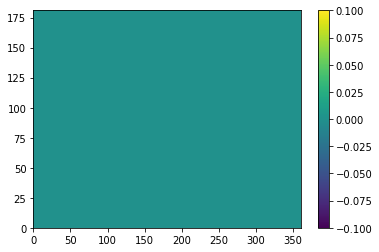

In [32]:
plt.pcolormesh(np.imag(M_rego_wav1_s[15]));plt.colorbar()

In [10]:
M_rego_wavno0 = np.load('/data4/nmahesh/edges/Lunar/M_rego_wavno0.npy')
M_rego_wav0 = np.load('/data4/nmahesh/edges/Lunar/M_rego_wav0.npy')
M_rego_wavno1 = np.load('/data4/nmahesh/edges/Lunar/M_rego_wavno1.npy')
M_rego_wav1 = np.load('/data4/nmahesh/edges/Lunar/M_rego_wav1.npy')
M_rego_wavno2 = np.load('/data4/nmahesh/edges/Lunar/M_rego_wavno2.npy')
M_rego_wav2 = np.load('/data4/nmahesh/edges/Lunar/M_rego_wav2.npy')

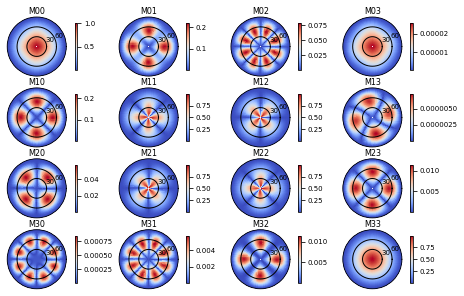

In [11]:
freq = '2MHz'
ff.plot_muller_cal_abs(M_rego_wavno1,title='Dipole100m_regolith_nooffset_'+freq+'_abs', save_fig=True)

<ipython-input-60-a80cdc4dfeb5>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4,4,j+1)
<ipython-input-60-a80cdc4dfeb5>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4,4,j+1)
<ipython-input-60-a80cdc4dfeb5>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created an

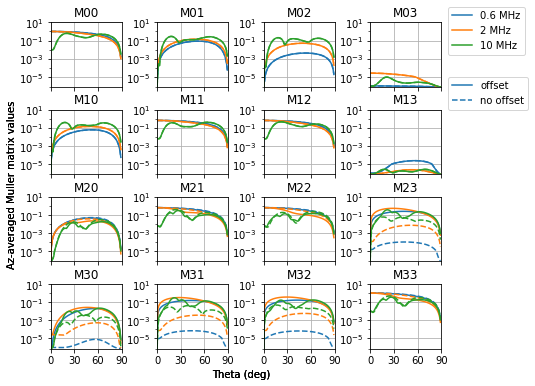

In [60]:
plt.figure(figsize=(7,6))
plt.rc('font',size=10)
plt.subplots_adjust(hspace=0.35,wspace=0.5)
freq=[0.6,2,10]
for i in range(3):

    if i == 0:
        M = M_rego_wav0
        Mno = M_rego_wavno0
        n = np.max(M_rego_wav0[0])
    if i==1:
        M = M_rego_wav1
        Mno = M_rego_wavno1
        n = np.max(M_rego_wav1[0])#[0][0]
    if i==2:
        M = M_rego_wav2
        Mno = M_rego_wavno2
        n = np.max(M_rego_wav2[0])#[0][0]

    for j in range(16):
        plt.subplot(4,4,j+1)
        plt.title('M'+str(int(j/4))+str(j%4))
        plt.plot(np.mean(np.abs(M[j][:90,:]/n), axis=1),color= f"C{i}",label=str(freq[i])+' MHz')
        plt.plot(np.mean(np.abs(Mno[j][:90,:]/n),axis=1),'--',color= f"C{i}")
        if j ==3:
            plt.legend(loc=(1.1,0.5))
        if j==7:
            plt.legend(('offset', 'no offset'),loc=(1.1,1))
        plt.grid()
        if j in [12,13,14,15]:
            plt.xticks([0,30,60,90])
        else:
            plt.xticks([0,30,60,90],[])
        plt.xlim([0,90])
      
        plt.ylim([0,10])
        plt.yscale('symlog',linthreshy=10**-5)
        plt.yticks([10**-5,10**-3,10**-1,10**1])
    plt.text(-200,-10**-3, 'Theta (deg)',fontdict={'fontsize':10,'weight':'light'})
    plt.text(-460,10**3, 'Az-averaged Muller matrix values', rotation=90, fontdict={'fontsize':10, 'weight':'light'} )
    plt.savefig('/data4/nmahesh/edges/Lunar/plots/av-beam-stokes_abs.pdf',dpi=300,bbox_inches='tight')

In [11]:
IXM = np.sqrt(M_rego_wav0[1]**2 + M_rego_wav0[2]**2 + M_rego_wav0[3]**2)/np.abs(M_rego_wav0[0]) 
IXM2 = np.sqrt(M_rego_wav1[1]**2 + M_rego_wav1[2]**2 + M_rego_wav1[3]**2)/np.abs(M_rego_wav1[0]) 
IXM3 = np.sqrt(M_rego_wav2[1]**2 + M_rego_wav2[2]**2 + M_rego_wav2[3]**2)/np.abs(M_rego_wav2[0]) 

IXM_off = np.sqrt(M_rego_wavno0[1]**2 + M_rego_wavno0[2]**2 + M_rego_wavno0[3]**2)/np.abs(M_rego_wavno0[0]) 
IXM2_off = np.sqrt(M_rego_wavno1[1]**2 + M_rego_wavno1[2]**2 + M_rego_wavno1[3]**2)/np.abs(M_rego_wavno1[0]) 
IXM3_off = np.sqrt(M_rego_wavno2[1]**2 + M_rego_wavno2[2]**2 + M_rego_wavno2[3]**2)/np.abs(M_rego_wavno2[0]) 


IXMv = np.sqrt(M_rego_wav0[12]**2 + M_rego_wav0[13]**2 + M_rego_wav0[14]**2)/np.abs(M_rego_wav0[15]) 
IXMv2 = np.sqrt(M_rego_wav1[12]**2 + M_rego_wav1[13]**2 + M_rego_wav1[14]**2)/np.abs(M_rego_wav1[15]) 
IXMv3 = np.sqrt(M_rego_wav2[12]**2 + M_rego_wav2[13]**2 + M_rego_wav2[14]**2)/np.abs(M_rego_wav2[15]) 

IXMv_off = np.sqrt(M_rego_wavno0[12]**2 + M_rego_wavno0[13]**2 + M_rego_wavno0[14]**2)/np.abs(M_rego_wavno0[15]) 
IXMv2_off = np.sqrt(M_rego_wavno1[12]**2 + M_rego_wavno1[13]**2 + M_rego_wavno1[14]**2)/np.abs(M_rego_wavno1[15]) 
IXMv3_off = np.sqrt(M_rego_wavno2[12]**2 + M_rego_wavno2[13]**2 + M_rego_wavno2[14]**2)/np.abs(M_rego_wavno2[15]) 

<ipython-input-11-06fa721ee868>:1: RuntimeWarning: invalid value encountered in true_divide
  IXM = np.sqrt(M_rego_wav0[1]**2 + M_rego_wav0[2]**2 + M_rego_wav0[3]**2)/np.abs(M_rego_wav0[0])
<ipython-input-11-06fa721ee868>:2: RuntimeWarning: invalid value encountered in true_divide
  IXM2 = np.sqrt(M_rego_wav1[1]**2 + M_rego_wav1[2]**2 + M_rego_wav1[3]**2)/np.abs(M_rego_wav1[0])
<ipython-input-11-06fa721ee868>:3: RuntimeWarning: invalid value encountered in true_divide
  IXM3 = np.sqrt(M_rego_wav2[1]**2 + M_rego_wav2[2]**2 + M_rego_wav2[3]**2)/np.abs(M_rego_wav2[0])
<ipython-input-11-06fa721ee868>:5: RuntimeWarning: invalid value encountered in true_divide
  IXM_off = np.sqrt(M_rego_wavno0[1]**2 + M_rego_wavno0[2]**2 + M_rego_wavno0[3]**2)/np.abs(M_rego_wavno0[0])
<ipython-input-11-06fa721ee868>:6: RuntimeWarning: invalid value encountered in true_divide
  IXM2_off = np.sqrt(M_rego_wavno1[1]**2 + M_rego_wavno1[2]**2 + M_rego_wavno1[3]**2)/np.abs(M_rego_wavno1[0])
<ipython-input-11-06fa7

<Figure size 432x216 with 0 Axes>

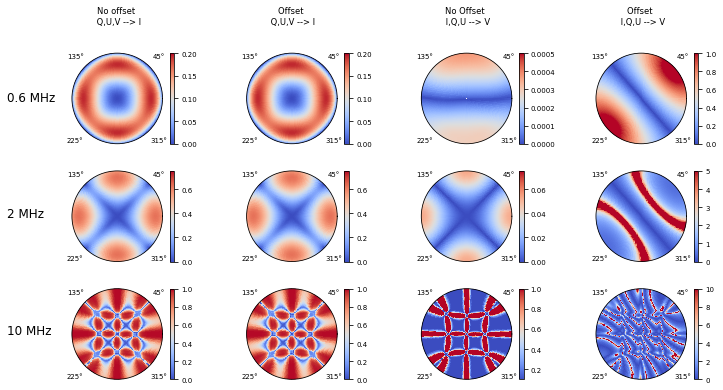

In [12]:
plt.figure(figsize=(6,3))

fig,ax = plt.subplots(3,4, subplot_kw=dict(polar=True),figsize=(12,6))
plt.subplots_adjust(hspace=0.3)
p = ax[0,0].pcolormesh(P,T,np.abs(IXM[:91,:]),vmin=0,vmax=0.2,cmap = 'coolwarm', rasterized = True)
plt.colorbar(p,ax=ax[0,0])
ax[0,0].set_title('No offset \n Q,U,V --> I',pad=25)
ax[0,0].set_yticklabels([])
ax[0,0].set_xticks(np.array([45,135,225,315])*np.pi/180)
ax[0,0].text(0.08,0.77,'0.6 MHz', transform=plt.gcf().transFigure,fontsize=12)

p = ax[1,0].pcolormesh(P,T,np.abs(IXM2[:91,:]),vmin=0,vmax=0.75,cmap = 'coolwarm', rasterized = True)
plt.colorbar(p,ax=ax[1,0])
ax[1,0].set_yticklabels([])
ax[1,0].set_xticks(np.array([45,135,225,315])*np.pi/180)
ax[1,0].text(0.08,0.5,'2 MHz', transform=plt.gcf().transFigure,fontsize=12)

p = ax[2,0].pcolormesh(P,T,np.abs(IXM3[:91,:]),vmin=0,vmax=1,cmap = 'coolwarm', rasterized = True)
plt.colorbar(p,ax=ax[2,0])
ax[2,0].set_yticklabels([])
ax[2,0].set_xticks(np.array([45,135,225,315])*np.pi/180)
ax[2,0].text(0.08,0.23,'10 MHz', transform=plt.gcf().transFigure,fontsize=12)

p = ax[0,1].pcolormesh(P,T,np.abs(IXM_off[:91,:]),vmin=0,vmax=0.2,cmap = 'coolwarm', rasterized = True)
plt.colorbar(p,ax=ax[0,1])
ax[0,1].set_title('Offset \n Q,U,V --> I',pad=25)
ax[0,1].set_yticklabels([])
ax[0,1].set_xticks(np.array([45,135,225,315])*np.pi/180)

p = ax[1,1].pcolormesh(P,T,np.abs(IXM2_off[:91,:]),vmin=0,vmax=0.75,cmap = 'coolwarm', rasterized = True)
plt.colorbar(p,ax=ax[1,1])
ax[1,1].set_yticklabels([])
ax[1,1].set_xticks(np.array([45,135,225,315])*np.pi/180)

p = ax[2,1].pcolormesh(P,T,np.abs(IXM3_off[:91,:]),vmin=0,vmax=1,cmap = 'coolwarm', rasterized = True)
plt.colorbar(p,ax=ax[2,1])
ax[2,1].set_yticklabels([])
ax[2,1].set_xticks(np.array([45,135,225,315])*np.pi/180)

p = ax[0,2].pcolormesh(P,T,np.abs(IXMv_off[:91,:]),vmin=0,vmax=0.0005,cmap = 'coolwarm', rasterized = True)
plt.colorbar(p,ax=ax[0,2])
ax[0,2].set_title('No Offset \n I,Q,U --> V',pad=25)
ax[0,2].set_yticklabels([])
ax[0,2].set_xticks(np.array([45,135,225,315])*np.pi/180)

p = ax[1,2].pcolormesh(P,T,np.abs(IXMv2_off[:91,:]),vmin=0,vmax=0.075,cmap = 'coolwarm', rasterized = True)
plt.colorbar(p,ax=ax[1,2])
ax[1,2].set_yticklabels([])
ax[1,2].set_xticks(np.array([45,135,225,315])*np.pi/180)

p = ax[2,2].pcolormesh(P,T,np.abs(IXMv3_off[:91,:]),vmin=0.1,vmax=1,cmap = 'coolwarm', rasterized = True)
plt.colorbar(p,ax=ax[2,2])
ax[2,2].set_yticklabels([])
ax[2,2].set_xticks(np.array([45,135,225,315])*np.pi/180)

p = ax[0,3].pcolormesh(P,T,np.abs(IXMv[:91,:]),vmin=0,vmax=1,cmap = 'coolwarm', rasterized = True)
plt.colorbar(p,ax=ax[0,3])
ax[0,3].set_title('Offset \n I,Q,U --> V',pad=25)
ax[0,3].set_yticklabels([])
ax[0,3].set_xticks(np.array([45,135,225,315])*np.pi/180)


p = ax[1,3].pcolormesh(P,T,np.abs(IXMv2[:91,:]),vmin=0,vmax=5,cmap = 'coolwarm', rasterized = True)
plt.colorbar(p,ax=ax[1,3])
ax[1,3].set_yticklabels([])
ax[1,3].set_xticks(np.array([45,135,225,315])*np.pi/180)

p = ax[2,3].pcolormesh(P,T,np.abs(IXMv3[:91,:]),vmin=0,vmax=10,cmap = 'coolwarm', rasterized = True)
plt.colorbar(p,ax=ax[2,3])
ax[2,3].set_yticklabels([])
ax[2,3].set_xticks(np.array([45,135,225,315])*np.pi/180)

plt.savefig('/data4/nmahesh/edges/Lunar/plots/IXM-beam-stokes.pdf',dpi=300,bbox_inches='tight')

In [66]:
offset = 1
phi = np.linspace(0,360,361)*np.pi/180
theta = np.linspace(0,90,91)*np.pi/180
    
J = np.zeros((2,2,len(theta),len(phi)), dtype='complex')  
J_2 = np.zeros((2,2,len(theta),len(phi)), dtype='complex')    
for i in range(1):
        for j in range(1):


            l = np.sin(theta[i])*np.cos(phi[j])
            m = np.sin(theta[i]) * np.sin(phi[j])                             
            del_phi = 2*np.pi* (del_u*l + del_v*m)
            J_b = np.array([[1,0],[0,np.exp(1j*del_phi)]])

            J[:,:,i,j] = np.array([[etheta[index,i,j],ephi[index,i,j]],[etheta[index, i,j],ephi[index, i,j]]])
            if offset==1:
                J_2[:,:,i,j] = np.dot(J_b,J[:,:,i,j])
            if offset ==2:
                J = J_b

In [52]:
a = np.array([10,9,1,3,4,5,5])/10
np.sqrt(np.mean(a**2))

0.6059231445842428